In [216]:
import numpy as np
from openTSNE import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import yaml
import os
import pickle
import seaborn as sns
import colorcet as cc
from scipy import stats

In [104]:
sns.set()

In [105]:
def plot(
    x,
    y,
    label_mapping=None,
    ax=None,
    title=None,
    draw_legend=True,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8), dpi=200)

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=label_mapping[yi] if label_mapping is not None else yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)

In [3]:
def get_label_name(label_mapping):
    cnames = []
    with open(label_mapping, 'r') as f:
        for line in f:
            cnames.append(line.split()[0])

    return cnames

In [5]:
cnames = get_label_name('dataset/Sketchy/zeroshot1/cname_cid_zero.txt')

In [6]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [273]:
savedir = "checkpoints"
feature_file = os.path.join(savedir, 'features_baseline.pickle')

In [274]:
with open(feature_file, 'rb') as fh:
    predicted_features_gallery, binary_features_gallery, gt_labels_gallery, \
    predicted_features_query, binary_features_query, gt_labels_query, \
    scores, binary_scores = pickle.load(fh)

In [244]:
k2, p = stats.normaltest(predicted_features_gallery)

In [246]:
p.sum()

5.5324027123732815

In [180]:
# classes = [i for i in range(10,20)]
# indexes = [i for i in range(len(predicted_features_gallery)) if gt_labels_gallery[i] in classes]

In [275]:
x_train, y_sake_image_train = predicted_features_gallery, gt_labels_gallery

In [276]:
%time sake_image_embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 4.70 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.25 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.17 seconds
===> Running optimization with exaggeration=12.00, lr=1425.08 for 250 iterations...
Iteration   50, KL divergence 4.9092, 50 iterations in 1.0437 sec
Iteration  100, KL divergence 4.2357, 50 iterations in 1.0820 sec
Iteration  150, KL divergence 4.0064, 50 iterations in 1.0793 sec
Iteration  200, KL divergence 3.8864, 50 iterations in 1.0997 sec
Iteration  250, KL divergence 3.8138, 50 iterations in 1.1676 sec
   --> Time elapsed: 5.47 seconds
===> Running optimization with exaggeration=1.00, lr=1425.08 for 500

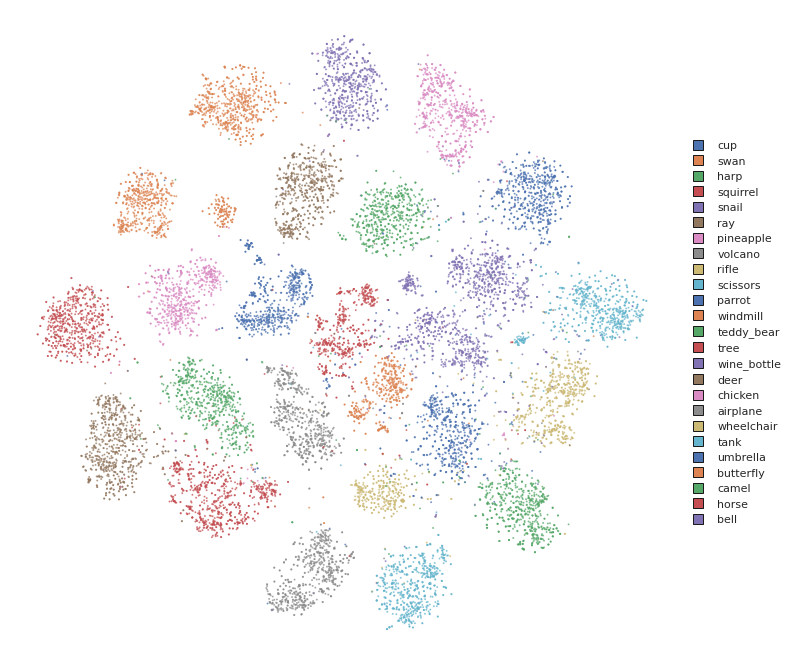

In [277]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = plot(sake_image_embedding_train, y_sake_image_train, cnames, ax=ax)

# Sketch

In [184]:
# indexes = [i for i in range(len(predicted_features_query)) if gt_labels_query[i] in classes]

In [193]:
x_train, y_sake_sketch_train = predicted_features_query, gt_labels_query

In [165]:
%time sake_sketch_embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1.54 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.09 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.12 seconds
===> Running optimization with exaggeration=12.00, lr=500.50 for 250 iterations...
Iteration   50, KL divergence 3.9151, 50 iterations in 0.5195 sec
Iteration  100, KL divergence 3.4745, 50 iterations in 0.3977 sec
Iteration  150, KL divergence 3.3676, 50 iterations in 0.3686 sec
Iteration  200, KL divergence 3.3188, 50 iterations in 0.3680 sec
Iteration  250, KL divergence 3.2903, 50 iterations in 0.3373 sec
   --> Time elapsed: 1.99 seconds
===> Running optimization with exaggeration=1.00, lr=500.50 for 500 i

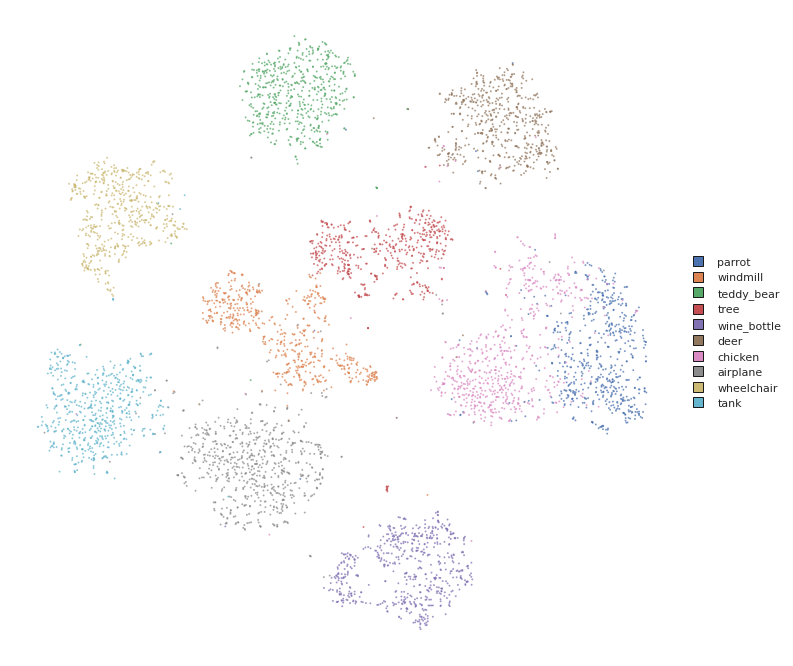

In [166]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = plot(sake_sketch_embedding_train, y_sake_sketch_train, cnames, ax=ax)

In [194]:
sake_sketch_embedding_train2image = sake_image_embedding_train.transform(x_train)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 6.20 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 219168.3893, 50 iterations in 0.2834 sec
Iteration  100, KL divergence 217123.6367, 50 iterations in 0.2579 sec
Iteration  150, KL divergence 215945.7667, 50 iterations in 0.2591 sec
Iteration  200, KL divergence 215205.1096, 50 iterations in 0.2651 sec
Iteration  250, KL divergence 214696.1087, 50 iterations in 0.2620 sec
   --> Time elapsed: 1.33 seconds


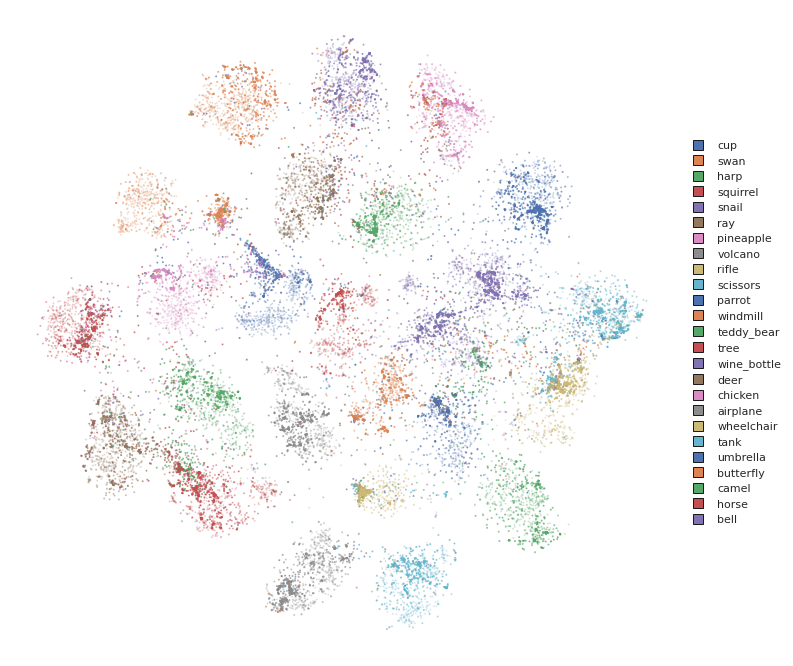

In [195]:
fig, ax = plt.subplots(figsize=(12, 12))
plot(sake_sketch_embedding_train2image, y_sake_sketch_train, cnames, ax=ax)
plot(sake_image_embedding_train, y_sake_image_train, cnames, ax=ax, alpha=0.2)

# KLD

In [280]:
savedir = "checkpoints/SAKE_KLD0.1/512/random_2930"
feature_file = os.path.join(savedir, 'features_zero.pickle')

In [281]:
with open(feature_file, 'rb') as fh:
    predicted_features_gallery, binary_features_gallery, gt_labels_gallery, \
    predicted_features_query, binary_features_query, gt_labels_query, \
    scores, binary_scores = pickle.load(fh)

In [284]:
k2, p = stats.normaltest(binary_features_gallery)

In [171]:
# indexes = [i for i in range(len(predicted_features_gallery)) if gt_labels_gallery[i] in classes]

In [286]:
x_train = binary_features_gallery
y_kld_image_train = gt_labels_gallery

In [287]:
%time kld_image_embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 5.25 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.23 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.36 seconds
===> Running optimization with exaggeration=12.00, lr=1425.08 for 250 iterations...
Iteration   50, KL divergence 4.9085, 50 iterations in 1.0469 sec
Iteration  100, KL divergence 4.2202, 50 iterations in 1.0790 sec
Iteration  150, KL divergence 3.9932, 50 iterations in 1.0943 sec
Iteration  200, KL divergence 3.8758, 50 iterations in 1.0390 sec
Iteration  250, KL divergence 3.8051, 50 iterations in 1.0991 sec
   --> Time elapsed: 5.36 seconds
===> Running optimization with exaggeration=1.00, lr=1425.08 for 500

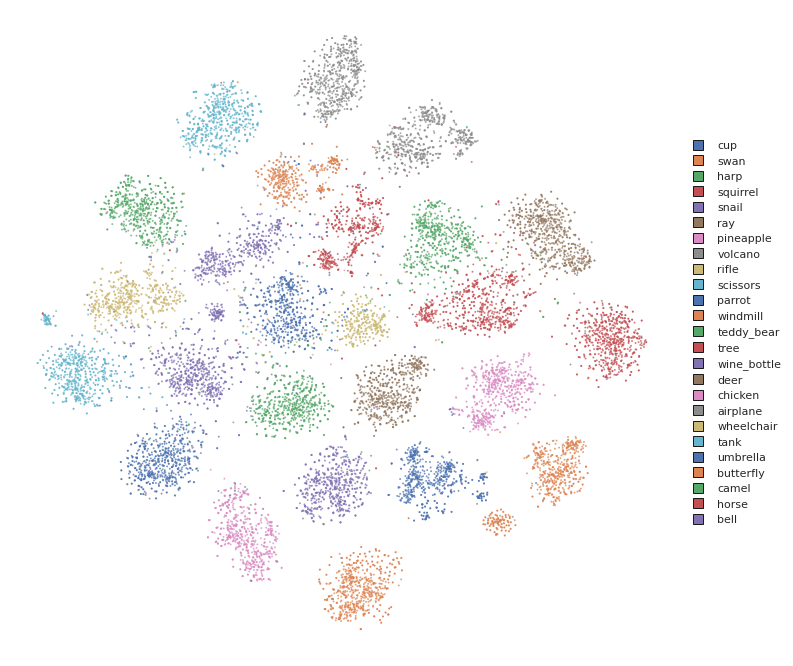

In [288]:
fig, ax = plt.subplots(figsize=(12, 12))
plot(kld_image_embedding_train, y_kld_image_train, cnames, ax=ax)

In [175]:
# indexes = [i for i in range(len(predicted_features_query)) if gt_labels_query[i] in classes]

In [289]:
kld_sketch_embedding_train2image = kld_image_embedding_train.transform(binary_features_query)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 5.30 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 253119.2473, 50 iterations in 0.2482 sec
Iteration  100, KL divergence 252585.1767, 50 iterations in 0.2229 sec
Iteration  150, KL divergence 252155.2158, 50 iterations in 0.2484 sec
Iteration  200, KL divergence 251813.1376, 50 iterations in 0.2176 sec
Iteration  250, KL divergence 251486.6456, 50 iterations in 0.2008 sec
   --> Time elapsed: 1.14 seconds


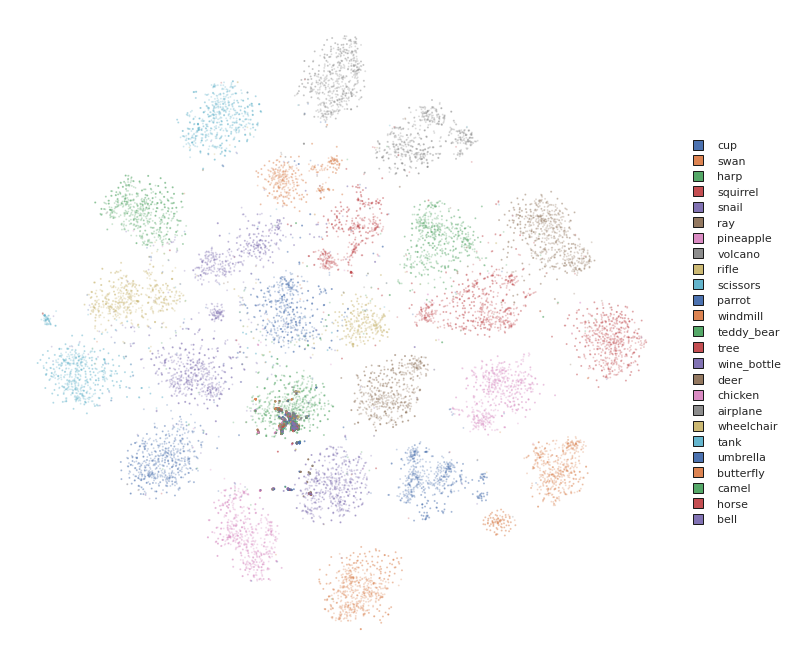

In [290]:
fig, ax = plt.subplots(figsize=(12, 12))
plot(kld_sketch_embedding_train2image, gt_labels_query, cnames, ax=ax)
plot(kld_image_embedding_train, y_kld_image_train, cnames, ax=ax, alpha=0.2)